In [282]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [283]:
# %matplotlib inline

In [284]:
import sys
import os
!head -n 3 data.txt

In [285]:
data_col=['book_bible','verse', 'extra']

In [286]:
df_text = pd.read_fwf('data.txt', sep=" ", colspecs='infer', names=data_col, widths=None, squeeze=True, header=None)
# df_text = pd.read_fwf('data.txt',colspecs='infer')

In [287]:
df_text.describe()

,book_bible,verse,extra
count,31102,31102,1076
unique,311,31090,845
top,Psalms,"Then Job answered and said,",.
freq,2461,4,29


In [288]:
df_text.head(3)

,book_bible,verse,extra
0,Genesis,1:1\tIn the beginning God created the heaven a...,NaN
1,Genesis,"1:2\tAnd the earth was without form, and void;...",NaN
2,Genesis,"1:3\tAnd God said, Let there be light: and the...",NaN


In [289]:
df_text.tail(3)

,book_bible,verse,extra
31099,Revelat,on 22:19\tAnd if any man shall take away from ...,NaN
31100,Revelat,on 22:20\tHe which testifieth these things sai...,NaN
31101,Revelat,on 22:21\tThe grace of our Lord Jesus Christ b...,NaN


In [290]:
del df_text['extra']

In [291]:
books_old_testament = ["Genesis","Exodus","Leviticus","Numbers","Deuteronomy","Joshua","Judges","Ruth","1 Samuel",
                       "2 Samuel","1 Kings","2 Kings","1 Chronicles","2 Chronicles","Ezra","Nehemiah","Esther","Job",
                       "Psalms","Proverbs","Ecclesiastes","Song of Solomon","Isaiah","Jeremiah","Lamentations","Ezekiel",
                       "Daniel","Hosea","Joel","Amos","Obadiah","Jonah","Micah","Nahum","Habakkuk","Zephaniah","Haggai",
                       "Zechariah","Malachi"]

In [292]:
books_new_testament = ["Matthew","Mark","Luke","John","Acts of Apostles","Romans","1 Corinthians","2 Corinthians",
                      "Galatians","Ephesians","Philippians","Colossians","1 Thessalonians","2 Thessalonians","1 Timothy",
                      "2 Timothy","Titus","Philemon","Hebrews","James","1 Peter","2 Peter","1 John","2 John","3 John",
                      "Jude","Revelation"]

In [293]:
df_text.columns

Index(['book_bible', 'verse'], dtype='object')

In [294]:
df_verses = df_text['verse']

In [295]:
df_verses.head(3)

0    1:1\tIn the beginning God created the heaven a...
1    1:2\tAnd the earth was without form, and void;...
2    1:3\tAnd God said, Let there be light: and the...
Name: verse, dtype: object

In [296]:
for row in df_verses:
    print(row)
    break

1:1	In the beginning God created the heaven and the earth.


In [297]:
# global _counted
# _counted = {}
# count = 0

In [298]:
_counted = {}
count = 0

for row in df_verses:
    stringed = str(row)
#     Clean each line - Remove punctuations
    pos = stringed.find('\t')
    stringed = stringed[pos:]
#     print(stringed)

    stringed = stringed.replace(",","")
    stringed = stringed.replace(";","")
    stringed = stringed.replace(".","")
    stringed = stringed.replace("?","")
    stringed = stringed.replace("!","")
    stringed = stringed.replace("(","")
    stringed = stringed.replace(")","")
#     stringed = stringed.replace("\t"," ")
    stringed = stringed.strip()
    collects = list(stringed.split(" "))

    for item in collects:
        if '\t' in item:
            item = item.replace('\t',' ')
        if item != 'God':
            item = item.lower()
            
        if ":" in item:
            continue
        
        if item == '':
            continue
            
        try:
            _counted[item] = _counted[item] + 1
        except KeyError:
            _counted[item] = 1
        

In [299]:
# sorted(_counted)
over_1000 = {}

for key in _counted.keys():
    if _counted[key] > 300:
        over_1000['{}'.format(key)] = _counted[key]
        

print(len(over_1000))

282


([<matplotlib.axis.XTick at 0x13bc730f0>,
 <a list of 282 Text xticklabel objects>)

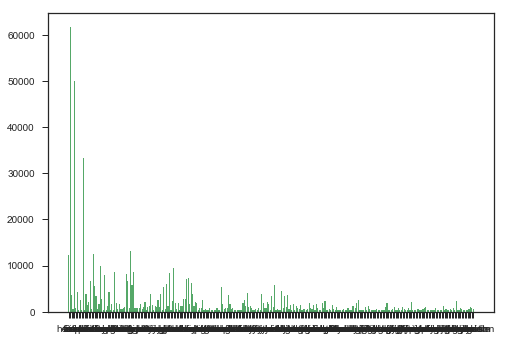

In [300]:
# sorted(_counted.values())
plt.bar(range(len(over_1000)), over_1000.values(), align="center", color="g")
plt.xticks(range(len(over_1000)), list(over_1000.keys()))

In [301]:
plt.show()

In [302]:
# fig, ax = plt.subplots(1,1, figsize=(6,6))
# N = 1000
# tag = np.random.randint(0,N,1000)
# # define the colormap
# cmap = plt.cm.jet

# scat = ax.scatter(over_1000.values(),over_1000.keys(),c=tag,s=np.random.randint(100,500,N),cmap=cmap,norm=norm)
# # create the colorbar
# cb = plt.colorbar(scat, spacing='proportional',ticks=bounds)
# cb.set_label('Custom cbar')
# ax.set_title('Discrete color mappings')
# plt.show()

In [303]:
over_1000.items()

dict_items([('in', 12198), ('the', 61655), ('God', 3709), ('heaven', 527), ('and', 50021), ('earth', 827), ('was', 4309), ('without', 397), ('upon', 2625), ('face', 381), ('of', 33340), ('spirit', 467), ('said', 3837), ('let', 1444), ('there', 2151), ('be', 6776), ('saw', 527), ('that', 12452), ('it', 5673), ('from', 3478), ('called', 597), ('day', 1597), ('he', 10010), ('were', 2664), ('first', 413), ('a', 7892), ('midst', 341), ('made', 1346), ('which', 4251), ('under', 377), ('so', 1618), ('together', 425), ('unto', 8693), ('one', 1887), ('place', 641), ('land', 1597), ('good', 661), ('bring', 705), ('forth', 825), ('after', 1128), ('his', 8158), ('is', 6693), ('brought', 834), ('to', 13067), ('them', 5840), ('for', 8673), ('days', 767), ('give', 860), ('two', 805), ('great', 897), ('also', 1687), ('set', 660), ('over', 972), ('hath', 2161), ('life', 389), ('may', 990), ('every', 1182), ('their', 3772), ('saying', 1413), ('thing', 495), ('us', 1324), ('make', 1023), ('man', 2455), (

In [304]:
# !pip3 install --upgrade bokeh

In [324]:
from bokeh.models import HoverTool, ColumnDataSource,LogColorMapper
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
plt.figure(figsize=(8, 6))

In [325]:
# from scipy.stats import kendalltau
x = list(over_1000.keys())
y = list(over_1000.values())
df_bokeh = pd.DataFrame(columns=["X", "Y"])
df_bokeh["X"] = x
print(len(x))
df_bokeh["Y"] = y
print(len(y))
N = 4000
colors=["#084594"]
radii = np.random.random(size=N)

282
282


In [326]:
# sns.pairplot(over_1000,x_vars=x, y_vars=y)
# output_file("rhema.html", title="Word Frequency")
p = figure()
p.circle(df_bokeh["X"],df_bokeh["Y"], radius=radii, fill_color=colors, fill_alpha=0.6, line_color=None)

/usr/local/lib/python3.6/site-packages/bokeh/models/sources.py:81: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/usr/local/lib/python3.6/site-packages/bokeh/models/sources.py:81: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/usr/local/lib/python3.6/site-packages/bokeh/models/sources.py:81: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


GlyphRenderer(id='ea4b4376-0181-4a0d-a0f0-6c8d8dc9a30f', ...)

In [327]:
output_notebook()

Loading BokehJS ...

In [328]:
show(p)

In [329]:
 p = figure(title="Rhema Word Freq", x_axis_label='Word', y_axis_label='Freq')

In [330]:
p.line(x,y, legend="Worded", line_width=2)
output_notebook()

Loading BokehJS ...

In [331]:
show(p)

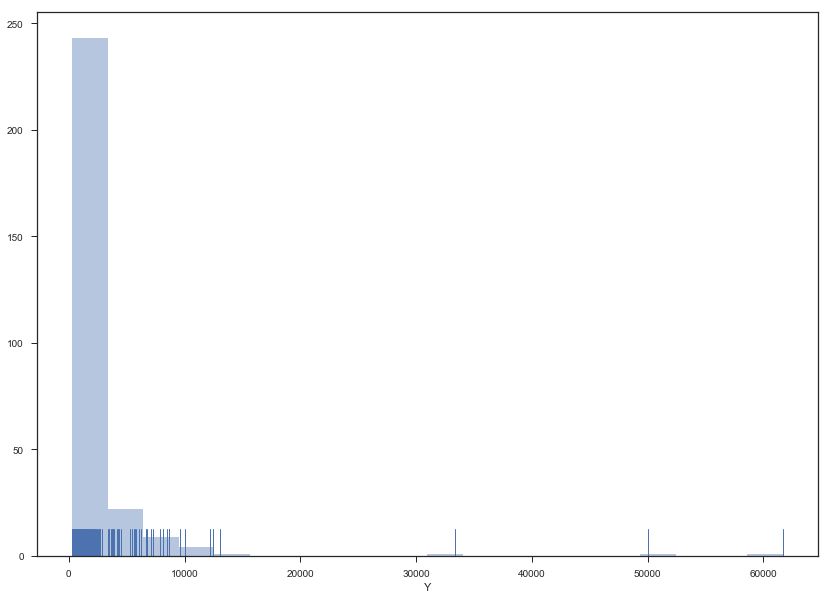

In [334]:
plt.figure(figsize=(14, 10))
sns.distplot(df_bokeh["Y"], bins=20, kde=False, rug=True);


In [335]:
# sns.jointplot(x="x", y="y", data=df_bokeh);

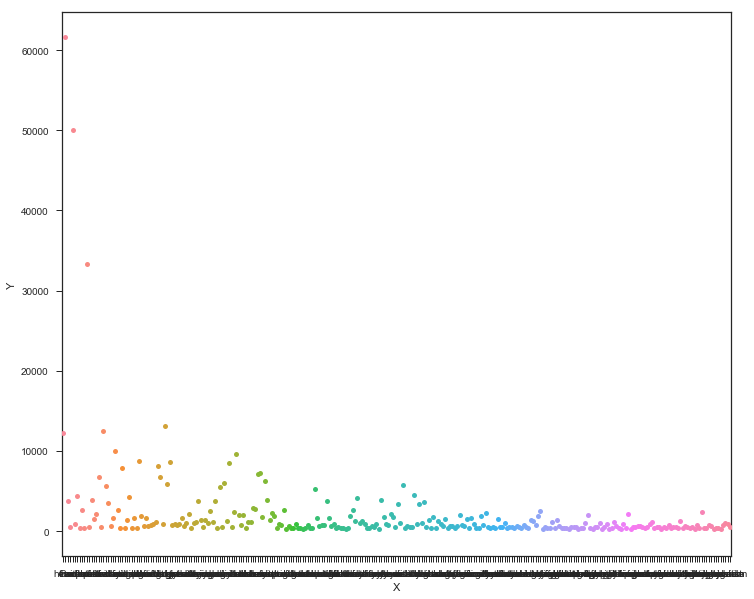

In [337]:
plt.figure(figsize=(12, 10))
sns.swarmplot(x=df_bokeh["X"], y=df_bokeh["Y"], data=df_bokeh);

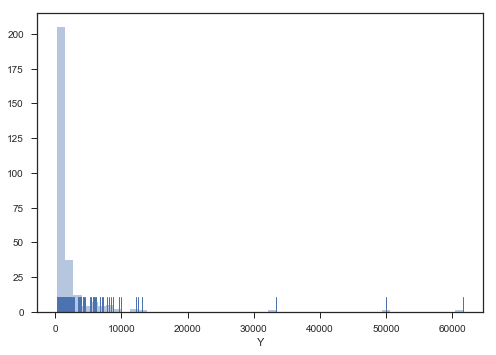

In [316]:
sns.distplot(df_bokeh["Y"], kde=False, rug=True);

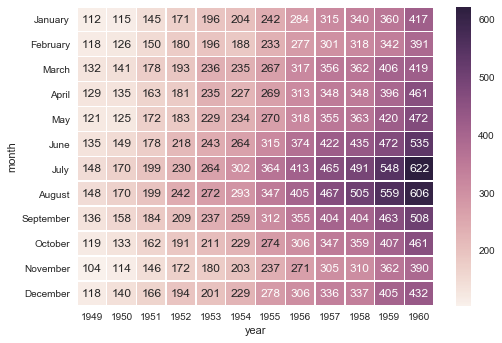

In [317]:
sns.set()

# Load the example flights dataset and conver to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5)


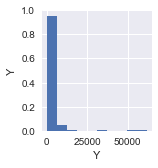

In [318]:
sns.pairplot(df_bokeh);


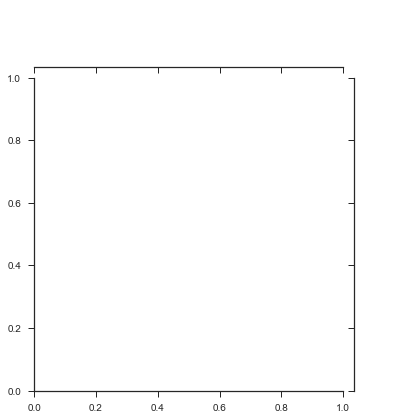

In [319]:
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
tips = df_bokeh
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

TypeError: cannot perform reduce with flexible type

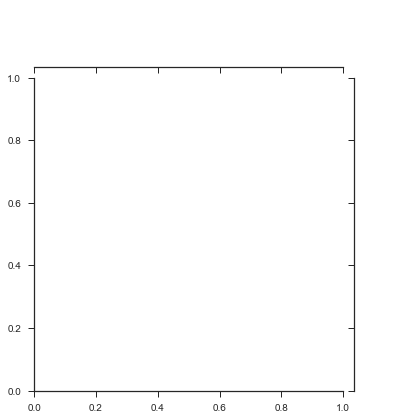

In [320]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

In [ ]:
sns.distplot(df_bokeh["Y"]);

In [ ]:
sns.kdeplot(df_bokeh["Y"], shade=True);

In [ ]:
# df = pd.DataFrame(over_1000)
# df = pd.DataFrame.from_dict(over_1000, orient='columns', dtype=None)
# plt.plot.area()


In [ ]:
# data = pd.read_fwf('data.txt', header = None)
data = pd.read_fwf('data.txt', names=['Books','Verse','Extras'])

len(data)

In [ ]:
df_data = pd.DataFrame(data)

In [ ]:
df_data.head()
df_heads = df_data['Books']
# books = df_data.groupby[df_data['0']]

In [ ]:
df_heads.head()

In [ ]:
df_heads.describe()